# Utilisation du modèle XGBoost pour la prédiction du nombre d'articles vendus par jour:

Nous utilisons ici le jeu de données après nettoyage, traitement et feature engineering: (sales_processed)

In [2]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [4]:
# Charger les données
df = pd.read_csv("sales_processed")
df = df.dropna()

In [5]:
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,revenue
0,2013-01-02,0,59,21788,0.063406,1.0,2,1,2013,-0.029076
1,2013-01-03,0,25,2495,0.005519,1.0,3,1,2013,-0.046658
2,2013-01-06,0,25,2497,0.474434,1.0,6,1,2013,0.095765
3,2013-01-15,0,25,2498,0.121293,1.0,15,1,2013,-0.011494
4,2013-01-10,0,25,2507,-0.312861,1.0,10,1,2013,-0.143358
...,...,...,...,...,...,...,...,...,...,...
2928487,2015-10-10,33,25,7263,-0.341805,1.0,10,10,2015,-0.152149
2928488,2015-10-09,33,25,7314,-0.341805,1.0,9,10,2015,-0.152149
2928489,2015-10-14,33,25,7313,-0.312861,1.0,14,10,2015,-0.143358
2928490,2015-10-22,33,25,7294,-0.341805,1.0,22,10,2015,-0.152149


In [6]:
# Prétraitement des données
df['date'] = pd.to_datetime(df['date'])  # Convertir en datetime
df = df.sort_values(by='date')  # Trier par date

In [7]:
# Séparer les caractéristiques (X) et la cible (y)
X = df.drop(columns=["date", "item_cnt_day"])
y = df["item_cnt_day"]

In [8]:
# Diviser en ensemble d'entraînement et de test (80% train, 20% test)
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [9]:
X_train

,date_block_num,shop_id,item_id,item_price,day,month,year,revenue
28730,0,27,2620,0.063406,1,1,2013,-0.029076
92756,0,42,13573,-0.284288,1,1,2013,-0.134680
54139,0,8,18144,-0.399692,1,1,2013,-0.169731
100206,0,51,17895,-0.388114,1,1,2013,-0.166214
114381,0,46,5177,-0.168143,1,1,2013,0.005912
...,...,...,...,...,...,...,...,...
2367449,24,28,18396,-0.399692,6,1,2015,-0.169731
2354123,24,40,11918,0.584390,6,1,2015,0.129161
2367461,24,28,18684,-0.283917,6,1,2015,-0.134567
2354116,24,40,13400,0.034462,6,1,2015,-0.037867


In [10]:
X_test

,date_block_num,shop_id,item_id,item_price,day,month,year,revenue
2402709,24,53,17015,-0.226030,6,1,2015,-0.116985
2331791,24,10,16550,-0.468577,6,1,2015,-0.190653
2402704,24,53,17416,-0.110256,6,1,2015,0.041076
2367504,24,28,17995,-0.458158,6,1,2015,-0.187488
2402690,24,53,17075,-0.110256,6,1,2015,-0.081821
...,...,...,...,...,...,...,...,...
2889993,33,55,5979,-0.283917,31,10,2015,-0.134567
2924705,33,21,4177,-0.341805,31,10,2015,-0.152149
2892131,33,58,21314,-0.283917,31,10,2015,-0.134567
2906487,33,19,7704,0.237067,31,10,2015,0.023670


In [11]:
y_train

,item_cnt_day
28730,1.0
92756,1.0
54139,1.0
100206,1.0
114381,2.0
...,...
2367449,1.0
2354123,1.0
2367461,1.0
2354116,1.0


In [12]:
y_test

,item_cnt_day
2402709,1.0
2331791,1.0
2402704,2.0
2367504,1.0
2402690,1.0
...,...
2889993,1.0
2924705,1.0
2892131,1.0
2906487,1.0


In [13]:
# Entraîner le modèle XGBoost
xgb_model = XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [14]:
y_pred = xgb_model.predict(X_test)

In [15]:
y_pred

array([1.0019356, 1.0239471, 1.9972899, ..., 0.9982796, 0.9998461,
       1.0019714], dtype=float32)

**Analyse des prédictions visuellement**

Nous allons ici évaluer notre modèle:

Dans un premier temps nous allons comparer les valeurs prédites et les valeurs réelles, nous observons que beaucoup de valeurs prédites sont superposées sur les valeurs réelles

 Les prédictions sont plus précises pour les valeurs faibles ou moyennes, car elles représentent la majorité des données.

Cela pourrait indiquer que le modèle n'a pas suffisamment appris à détecter des événements rares.

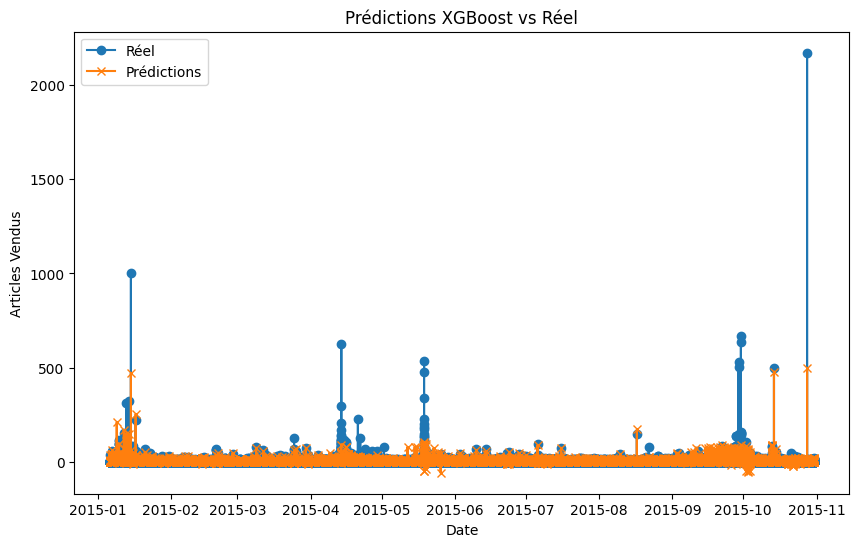

In [16]:
# Visualiser les prédictions
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['date'][train_size:], y_test, label="Réel", marker='o')
plt.plot(df['date'][train_size:], y_pred, label="Prédictions", marker='x')
plt.xlabel("Date")
plt.ylabel("Articles Vendus")
plt.legend()
plt.title("Prédictions XGBoost vs Réel")
plt.show()


Les points sont trés condensés comme la plage de date est assez longue, nous allons essayer de visulaliser ça sur chaque mois de l'année 2015.

Pour les mois: févirier, juin, juillet et août, la prédiction des valeurs basses et moyennes est trés précise, elle est également précise dans la prédiction des grandes valeurs et les évenement rares contrairement aux autres mois.

In [17]:
y_pred_rounded = np.rint(y_pred)

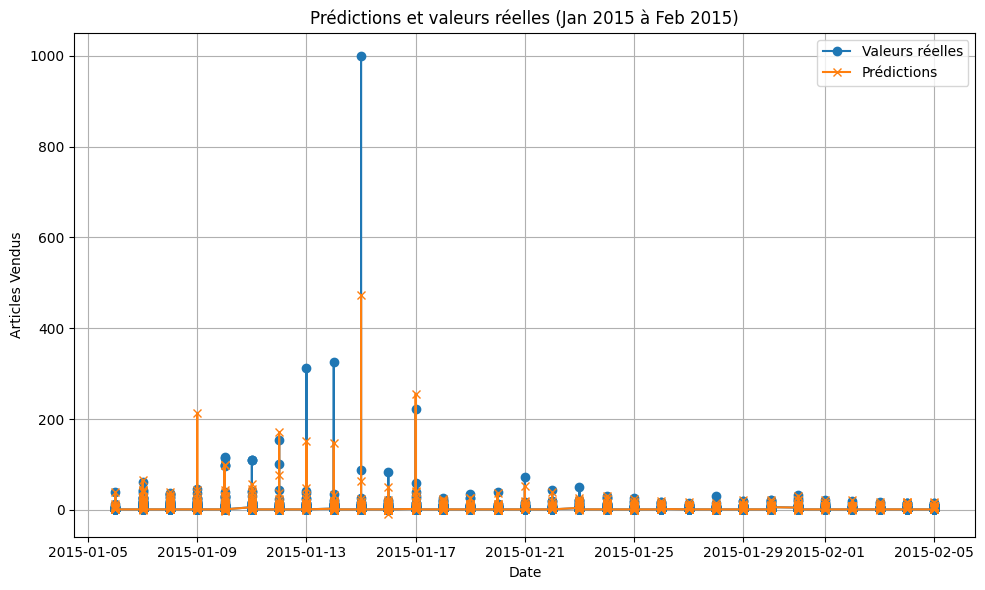

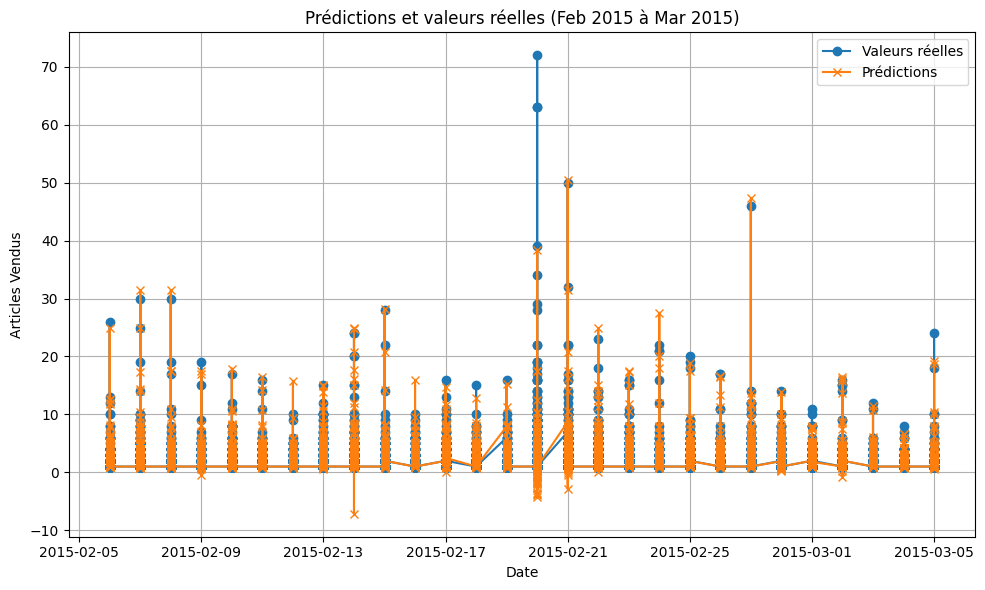

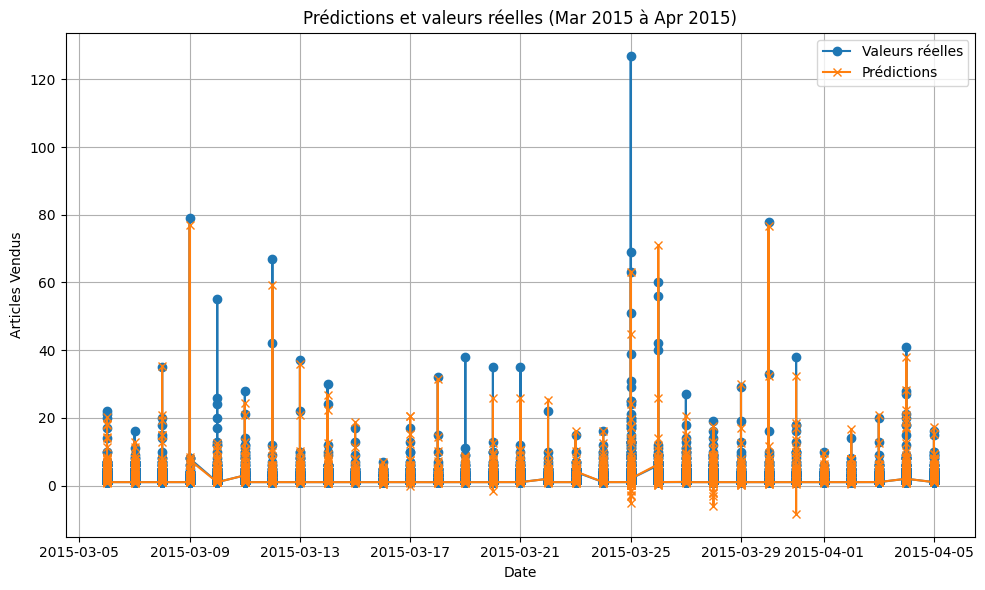

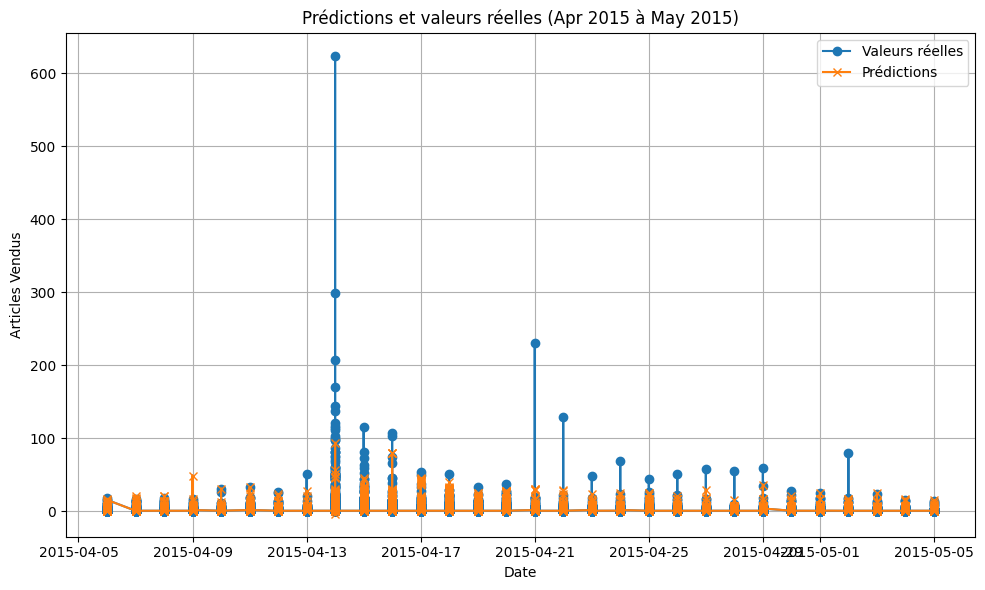

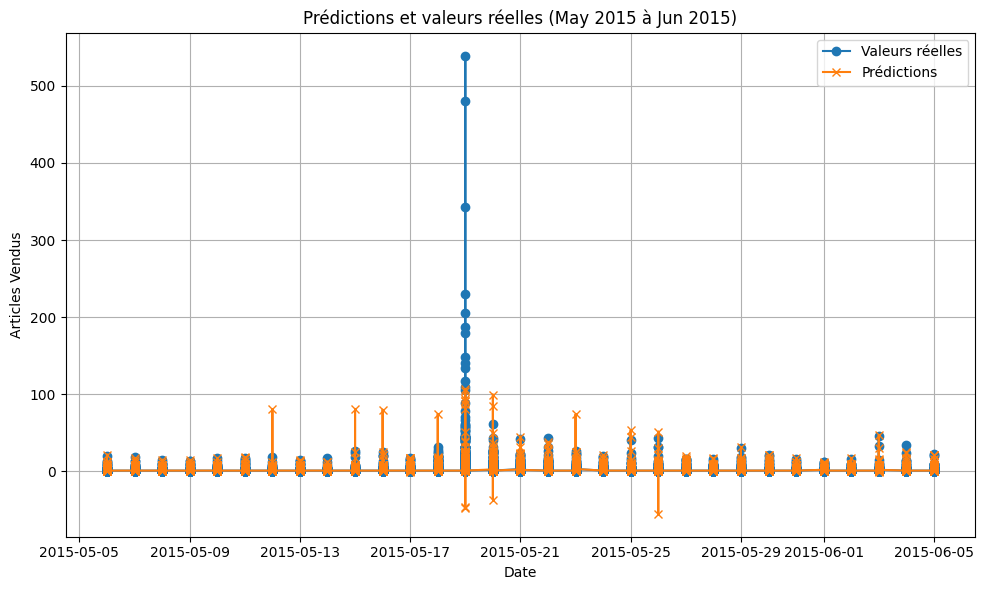

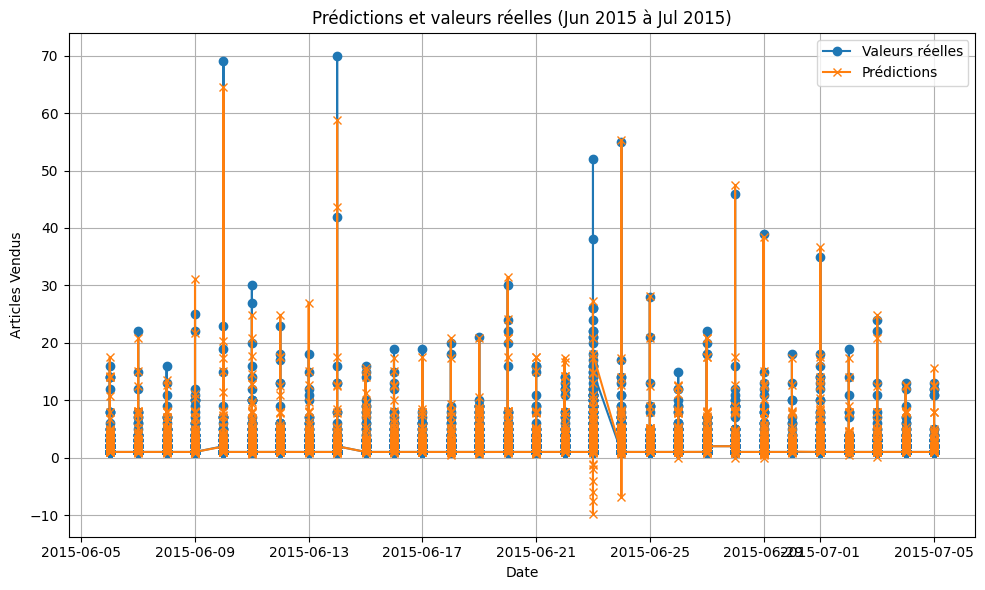

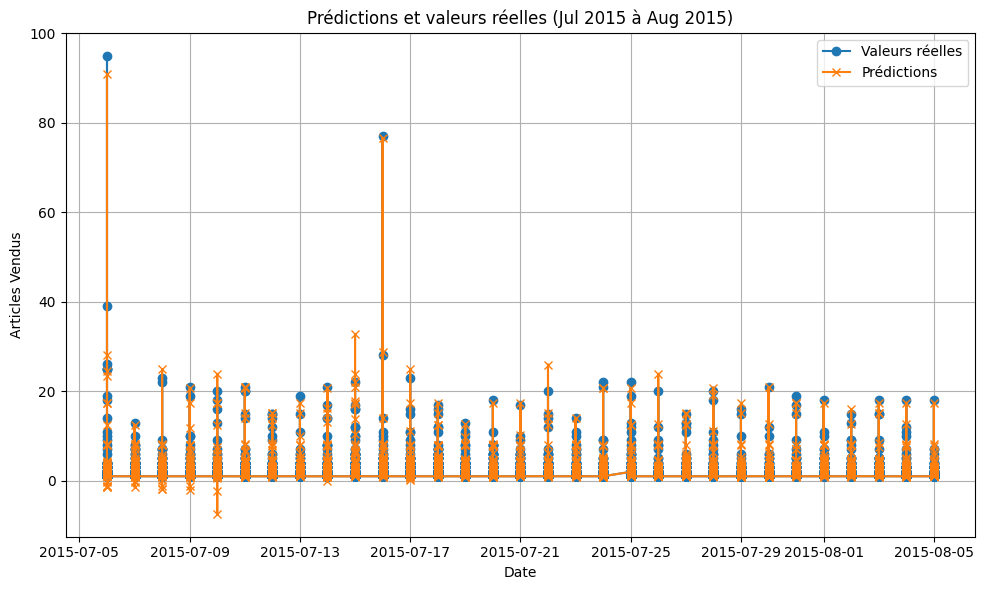

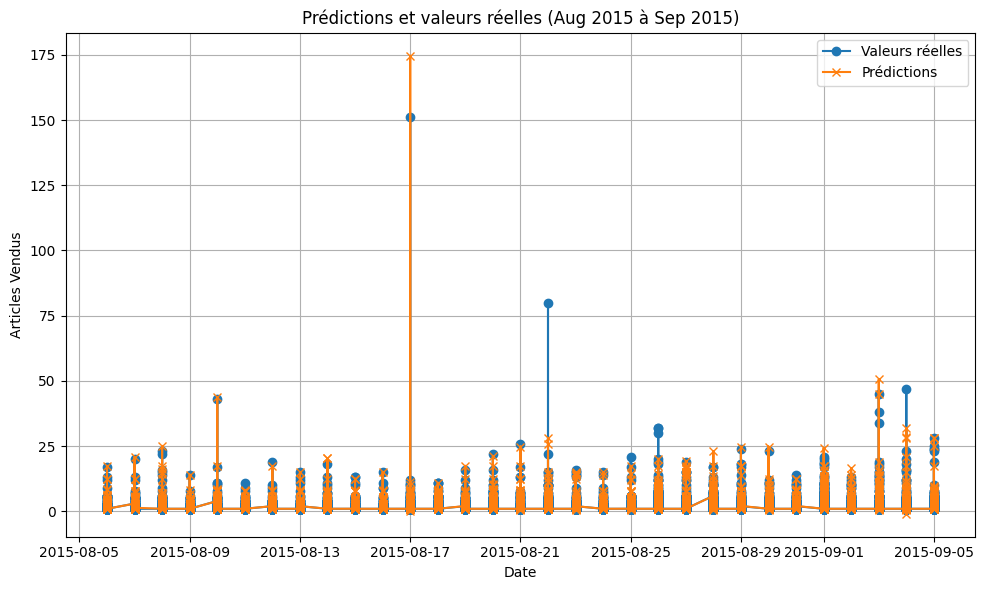

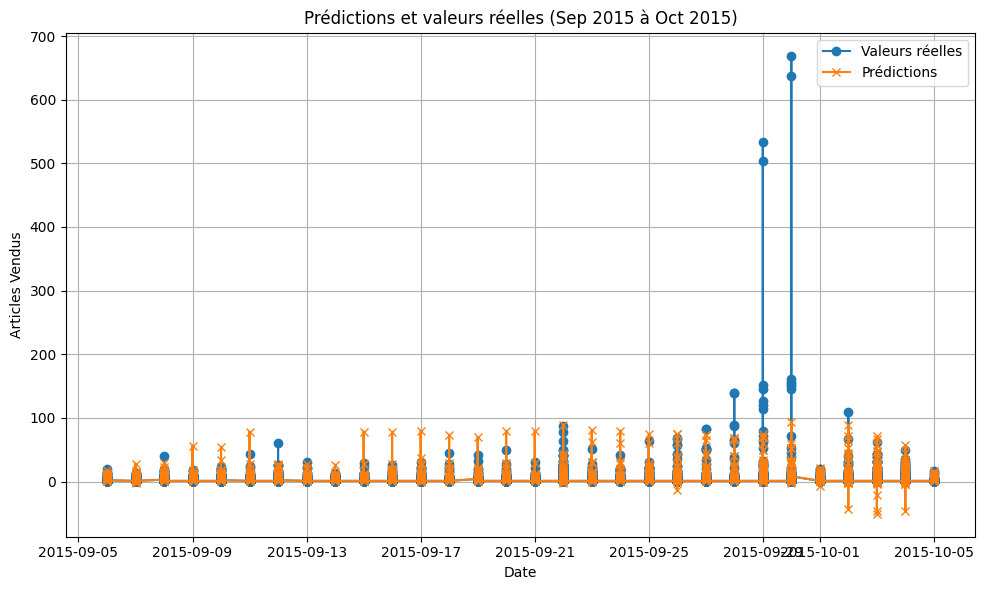

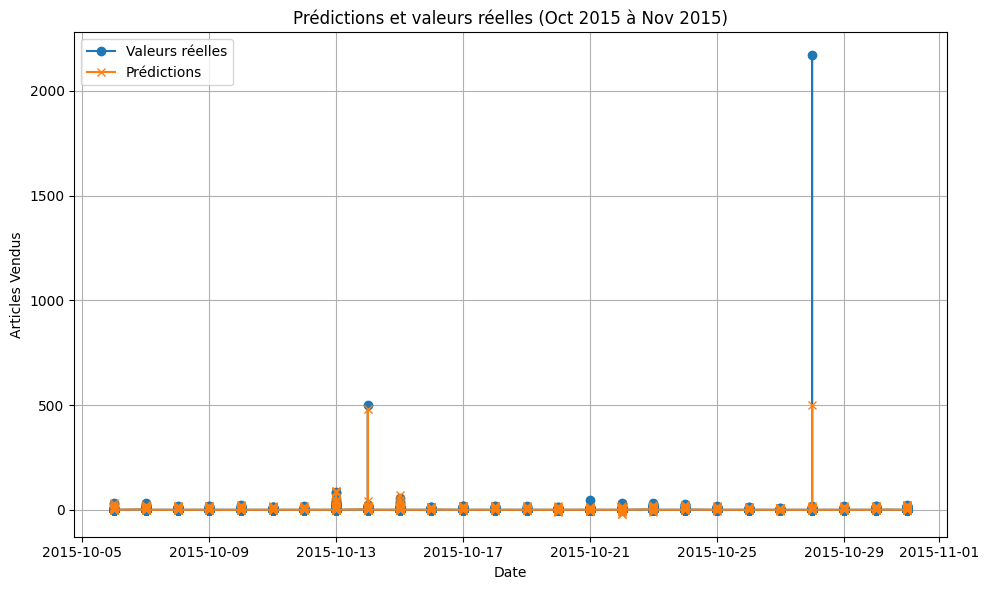

In [18]:
# Convertir y_test et y_pred en pandas.Series avec les dates comme index
dates_test = df['date'][train_size:]
y_test = pd.Series(y_test.values, index=dates_test)
y_pred = pd.Series(y_pred, index=dates_test)

# Choisir k mois pour la visualisation
k = 1  # Exemple : Afficher les données par tranches de 1 mois

# Grouper les données par tranche de k mois
start_date = dates_test.min()
end_date = dates_test.max()

# Tracer les prédictions et les valeurs réelles par tranche de k mois
current_date = start_date
while current_date < end_date:
    next_date = current_date + pd.DateOffset(months=k)

    # Filtrer les données pour cette période
    y_test_chunk = y_test[(y_test.index >= current_date) & (y_test.index < next_date)]
    y_pred_chunk = y_pred[(y_pred.index >= current_date) & (y_pred.index < next_date)]

    # Créer le graphique
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_chunk.index, y_test_chunk.values, label="Valeurs réelles", marker="o")
    plt.plot(y_pred_chunk.index, y_pred_chunk.values, label="Prédictions", marker="x")
    plt.title(f"Prédictions et valeurs réelles ({current_date.strftime('%b %Y')} à {next_date.strftime('%b %Y')})")
    plt.xlabel("Date")
    plt.ylabel("Articles Vendus")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


    current_date = next_date

Nous allons maintenant utiliser notre prédiction journalière pour avoir une prédiction mensuelle et visualiser cela:

<ipython-input-19-055f1ffce52f>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y_test_monthly = y_test.resample('M').mean()
<ipython-input-19-055f1ffce52f>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y_pred_monthly = y_pred.resample('M').mean()


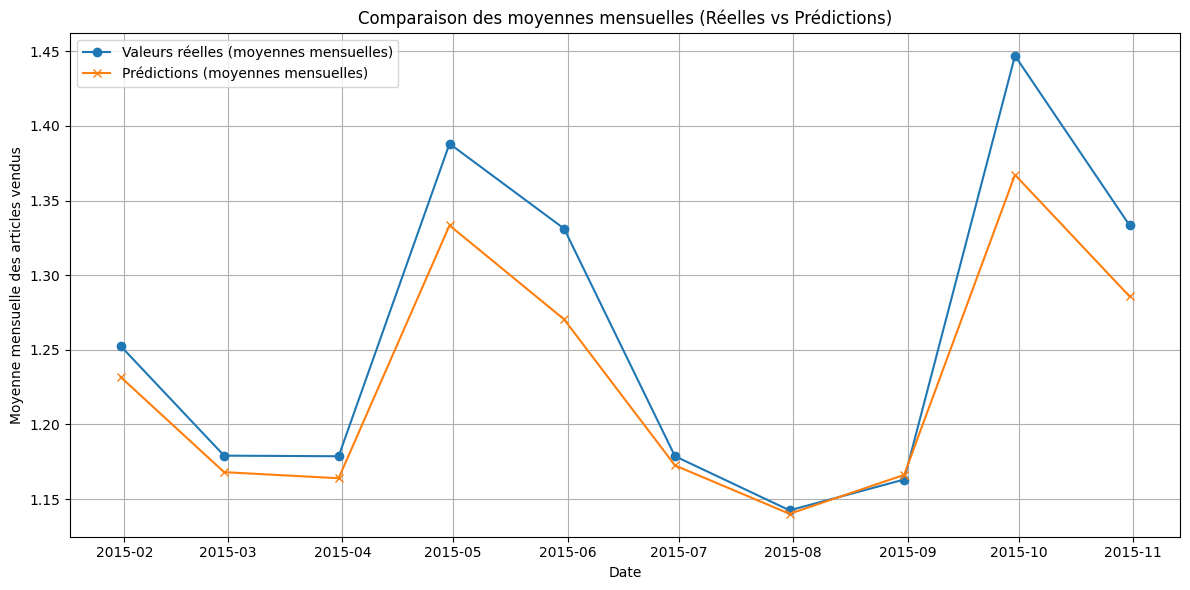

In [19]:
dates_test = df['date'][train_size:]
y_test = pd.Series(y_test.values, index=dates_test)
y_pred = pd.Series(y_pred, index=dates_test)

# Grouper par mois et calculer la moyenne pour chaque mois
y_test_monthly = y_test.resample('M').mean()
y_pred_monthly = y_pred.resample('M').mean()

# Tracer les moyennes mensuelles
plt.figure(figsize=(12, 6))
plt.plot(y_test_monthly.index, y_test_monthly.values, label="Valeurs réelles (moyennes mensuelles)", marker="o")
plt.plot(y_pred_monthly.index, y_pred_monthly.values, label="Prédictions (moyennes mensuelles)", marker="x")
plt.title("Comparaison des moyennes mensuelles (Réelles vs Prédictions)")
plt.xlabel("Date")
plt.ylabel("Moyenne mensuelle des articles vendus")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Nous pouvons voir sur le graphique ci-dessus que les valeurs prédites sont proches des valeurs réelles, la différence entre elles grandit proportionnellement par rapport aux grandes valeurs de la variable target ( item_cnt_day)

<ipython-input-20-a5fed56aa007>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y_test_monthly = y_test.resample('M').sum()
<ipython-input-20-a5fed56aa007>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y_pred_monthly = y_pred.resample('M').sum()


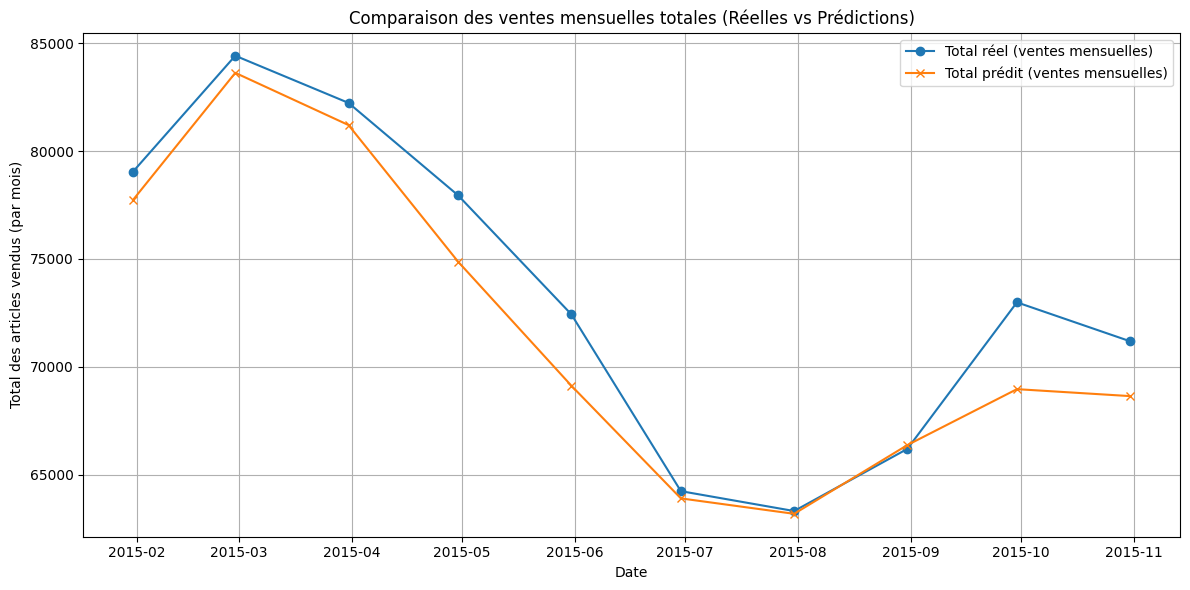

In [20]:

# Grouper par mois et calculer la somme pour chaque mois
y_test_monthly = y_test.resample('M').sum()
y_pred_monthly = y_pred.resample('M').sum()

# Tracer le total des ventes mensuelles
plt.figure(figsize=(12, 6))
plt.plot(y_test_monthly.index, y_test_monthly.values, label="Total réel (ventes mensuelles)", marker="o")
plt.plot(y_pred_monthly.index, y_pred_monthly.values, label="Total prédit (ventes mensuelles)", marker="x")
plt.title("Comparaison des ventes mensuelles totales (Réelles vs Prédictions)")
plt.xlabel("Date")
plt.ylabel("Total des articles vendus (par mois)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

**Analyse des erreurs et des scores:**

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# y_test : valeurs réelles
# y_pred : valeurs prédites par le modèle

# Calculer le MSE
mse = mean_squared_error(y_test, y_pred_rounded)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculer le MAE
mae = mean_absolute_error(y_test, y_pred_rounded)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Calculer le RMSE
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Mean Squared Error (MSE): 10.6416
Mean Absolute Error (MAE): 0.0637
Root Mean Squared Error (RMSE): 3.2622


Erreurs faibles (MAE : 0.0637) :

La faible valeur du MAE montre que les prédictions sont globalement proches des valeurs réelles.
En moyenne, l'écart entre une prédiction et sa valeur réelle est inférieur à 0.1 unités.

Impact des outliers (MSE : 10.6416) :

La valeur plus élevée du MSE (comparée au MAE) montre que certaines prédictions ont des écarts importants (outliers).
Ces écarts influencent fortement la MSE car les grandes erreurs sont élevées au carré.

Échelle des erreurs (RMSE : 3.2622) :

Le RMSE montre que les erreurs sont, en moyenne, d'environ 3.26 unités, ce qui est cohérent avec les variations naturelles des ventes.
Cependant, cela peut indiquer que le modèle a du mal à gérer des pics ou des variations importantes.

**Validation croisée basée sur TimesSeriesSplit **

In [22]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

tscv = TimeSeriesSplit(n_splits=5)

# Stockage des résultats
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

X = X_train  # Assurez-vous que X_train est trié par date
y = y_train

print("Début de la validation croisée basée sur TimeSeriesSplit...\n")

# Validation croisée
for fold, (train_idx, test_idx) in enumerate(tscv.split(X)):
    X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
    y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

    # Entraîner le modèle sur l'ensemble d'entraînement
    xgb_model.fit(X_train_fold, y_train_fold)

    # Prédictions sur l'ensemble de test
    y_pred_fold = xgb_model.predict(X_test_fold)

    # Calculer les scores pour ce split
    mse = mean_squared_error(y_test_fold, y_pred_fold)
    mae = mean_absolute_error(y_test_fold, y_pred_fold)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_fold, y_pred_fold)

    # Stocker les résultats
    mse_scores.append(mse)
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    print(f"Fold {fold + 1}:")
    print(f"  MSE  = {mse:.4f}")
    print(f"  MAE  = {mae:.4f}")
    print(f"  RMSE = {rmse:.4f}")
    print(f"  R²   = {r2:.4f}\n")

# Résultats globaux
print("\nRésultats finaux :")
print(f"MSE moyen : {np.mean(mse_scores):.4f} (± {np.std(mse_scores):.4f})")
print(f"MAE moyen : {np.mean(mae_scores):.4f} (± {np.std(mae_scores):.4f})")
print(f"RMSE moyen : {np.mean(rmse_scores):.4f} (± {np.std(rmse_scores):.4f})")
print(f"R² moyen : {np.mean(r2_scores):.4f} (± {np.std(r2_scores):.4f})")


Début de la validation croisée basée sur TimeSeriesSplit...

Fold 1:
  MSE  = 0.7101
  MAE  = 0.0565
  RMSE = 0.8427
  R²   = 0.6055

Fold 2:
  MSE  = 2.0164
  MAE  = 0.0796
  RMSE = 1.4200
  R²   = 0.6281

Fold 3:
  MSE  = 0.8209
  MAE  = 0.0473
  RMSE = 0.9060
  R²   = 0.7011

Fold 4:
  MSE  = 1.8840
  MAE  = 0.0436
  RMSE = 1.3726
  R²   = 0.5928

Fold 5:
  MSE  = 6.1217
  MAE  = 0.0959
  RMSE = 2.4742
  R²   = 0.1981


Résultats finaux :
MSE moyen : 2.3106 (± 1.9786)
MAE moyen : 0.0646 (± 0.0201)
RMSE moyen : 1.4031 (± 0.5847)
R² moyen : 0.5451 (± 0.1775)


**Analyse des résultats obtenus lors de la validation croisée avec** **TimeSeriesSplit**

Pour évaluer les performances du modèle, une validation croisée basée sur TimeSeriesSplit a été effectuée. Les résultats montrent des variations entre les différents folds, ce qui met en évidence certains comportements spécifiques du modèle selon les sous-ensembles des données.

Analyse par Fold :
Fold 1 :

Les erreurs sont faibles avec un MSE = 0.7101, un MAE = 0.0565, et un RMSE = 0.8427.
Le R² = 0.6055 indique que le modèle explique environ 60% de la variance des données pour ce fold, ce qui est satisfaisant.
Cela montre que le modèle est performant pour ce segment des données.
Fold 2 :

Les erreurs augmentent légèrement (MSE = 2.0164, RMSE = 1.4200), mais le R² reste stable à 0.6281.
Le MAE = 0.0796 reste dans une plage acceptable, bien que légèrement plus élevé que pour le Fold 1.
Fold 3 :

On observe une diminution des erreurs avec un MSE = 0.8209, un RMSE = 0.9060, et un MAE = 0.0473.
Le R² = 0.7011 est le plus élevé parmi les folds, ce qui montre que le modèle est particulièrement performant sur ce segment.
Fold 4 :

Les erreurs augmentent légèrement par rapport au Fold 3 (MSE = 1.8840, RMSE = 1.3726).
Cependant, le MAE = 0.0436 est le plus bas parmi tous les folds, indiquant que les prédictions sont globalement proches des valeurs réelles.
Le R² = 0.5928 reste stable mais légèrement inférieur.
Fold 5 :

Les erreurs augmentent significativement (MSE = 6.1217, RMSE = 2.4742).
Le MAE = 0.0959 est le plus élevé, et le R² = 0.1981 montre que le modèle explique très peu la variance des données dans ce fold.
Cela peut indiquer des difficultés du modèle à généraliser sur ce segment spécifique des données.

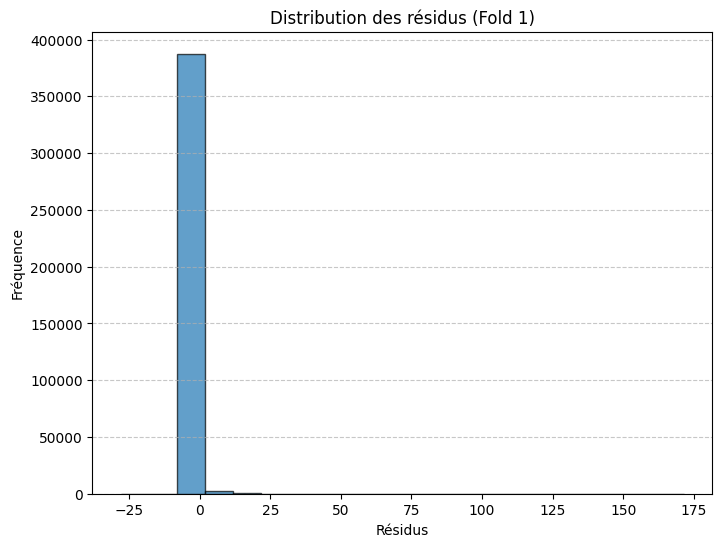

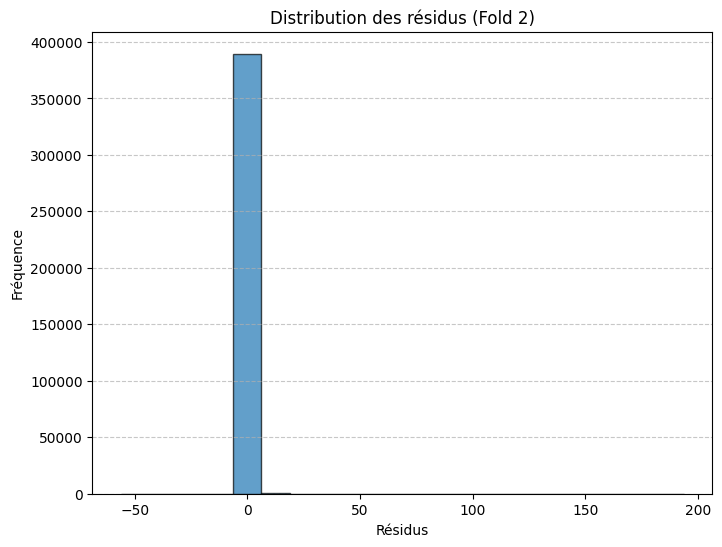

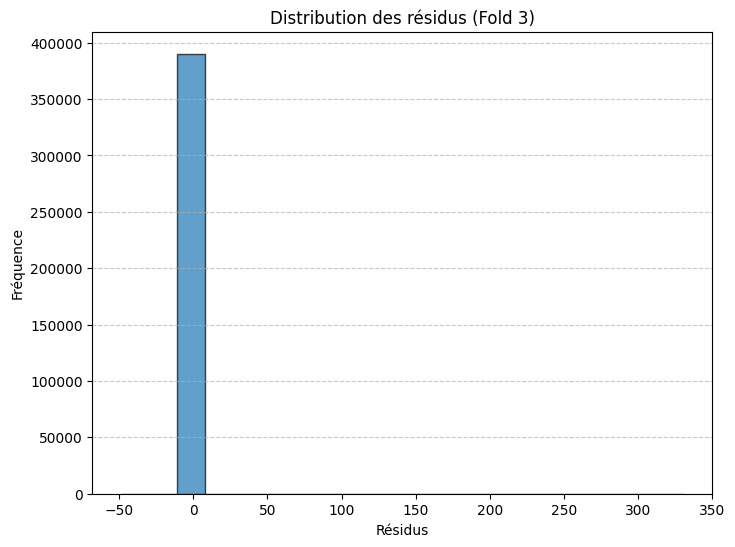

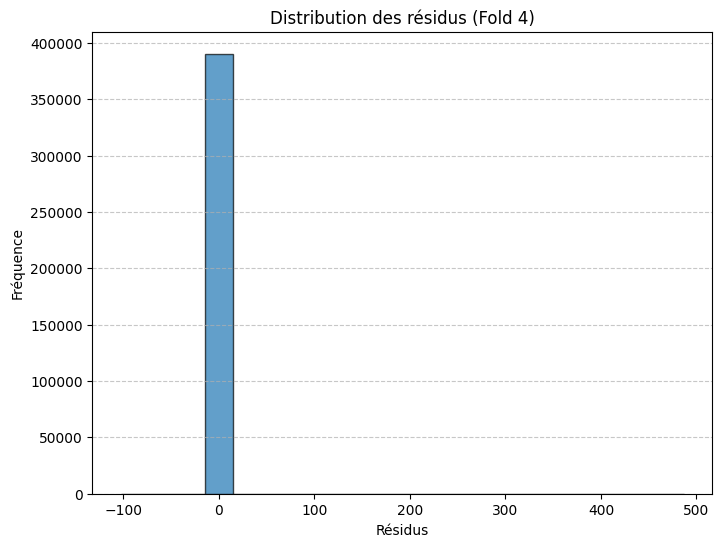

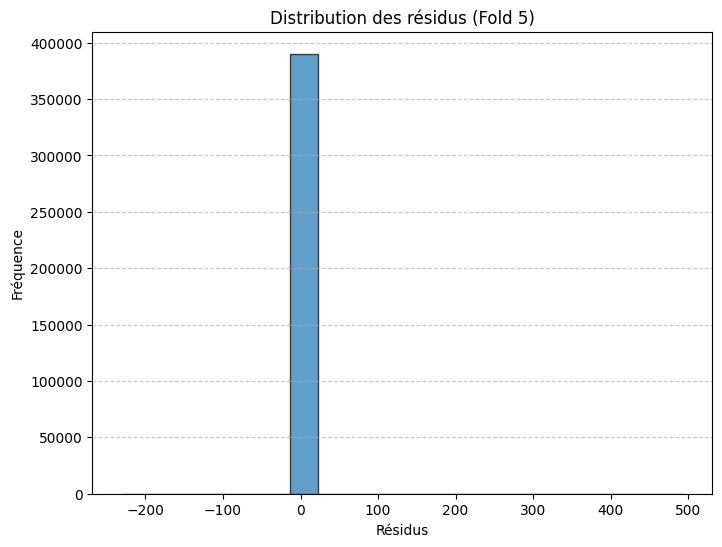

In [23]:

# Validation croisée
fold_number = 1  # Compteur pour les folds
for train_idx, test_idx in tscv.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

    # Entraîner le modèle
    xgb_model.fit(X_train_fold, y_train_fold)

    # Faire des prédictions
    y_pred_fold = xgb_model.predict(X_test_fold)

    # Calculer les résidus
    residuals = y_test_fold - y_pred_fold

    # Tracer les résidus pour ce fold
    plt.figure(figsize=(8, 6))
    plt.hist(residuals, bins=20, edgecolor="k", alpha=0.7)
    plt.title(f"Distribution des résidus (Fold {fold_number})")
    plt.xlabel("Résidus")
    plt.ylabel("Fréquence")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    fold_number += 1  # Passer au fold suivant


**Analyse des résidus**

Concentration autour de zéro :

Dans tous les folds, la majorité des résidus est très proche de zéro, ce qui indique que le modèle fait de bonnes prédictions pour la majorité des observations.
Résidus positifs et négatifs :

Les résidus sont répartis de manière asymétrique (plus de résidus positifs que négatifs), suggérant que le modèle a tendance à sous-estimer les valeurs réelles dans certains cas spécifiques.
Présence d'outliers :

On observe quelques résidus extrêmes, surtout dans les folds 4 et 5, où des valeurs atypiques se détachent nettement (par exemple, au-delà de
100
100 ou
−
100
−100).
Densité élevée proche de zéro :

La fréquence élevée autour de zéro montre que le modèle est globalement précis, mais certains segments présentent des difficultés spécifiques.

**Fine tuning**

Nous allons essayer d'améliorer notre modèle en trouvant les bons paramètres, nous avons limité le nombre de combinaisons à essayer nous rencontrons des difficultés relatives au temps et à la mémoire que consomme l'execution

Nous avons obtenus les paramètres optimisés pour améliorer notre modèle nous allons relancer un entrainement avec ce modèle utilisant ces paramètres

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

params = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5],
    "subsample": [0.8],  # Fixé
    "colsample_bytree": [0.8],  # Fixé
    "gamma": [0]  # Fixé
}

# Sous-échantillonnage
X_train_sample = X_train.sample(frac=0.5, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=XGBRegressor(objective="reg:squarederror", tree_method="gpu_hist", random_state=42),
    param_distributions=params,
    n_iter=15,  # Limiter à 15 combinaisons aléatoires
    scoring="neg_mean_squared_error",
    cv=3,  # Réduire les folds
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_sample, y_train_sample)
print("Meilleurs paramètres :", random_search.best_params_)

# Utiliser le modèle optimisé
best_model = random_search.best_estimator_


In [26]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialiser le modèle avec les meilleurs paramètres
best_model = XGBRegressor(
    objective="reg:squarederror",
    subsample=0.8,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    gamma=0,
    colsample_bytree=0.8,
    random_state=42
)

# Entraîner sur l'ensemble d'entraînement complet
best_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [27]:
# Prédire sur le jeu de test
y_pred_test = best_model.predict(X_test)

# Calculer les métriques
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Performances sur le jeu de test :")
print(f"MSE : {mse_test:.4f}")
print(f"MAE : {mae_test:.4f}")
print(f"R² : {r2_test:.4f}")


Performances sur le jeu de test :
MSE : 10.4991
MAE : 0.0787
R² : 0.4461


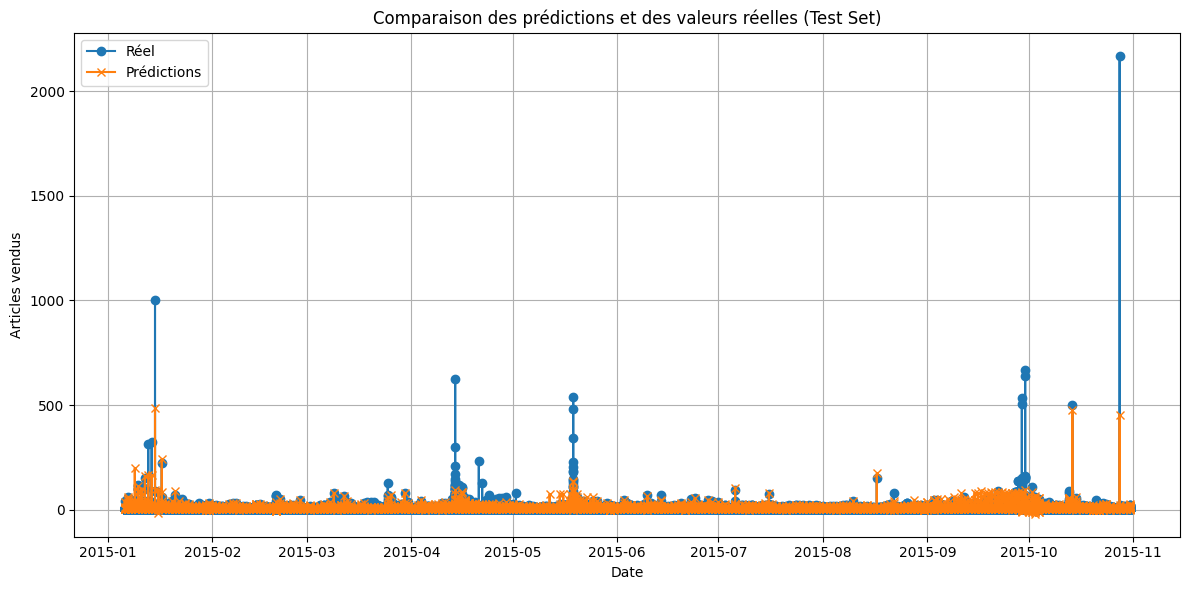

In [28]:
import matplotlib.pyplot as plt

# Visualiser les prédictions vs valeurs réelles
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label="Réel", marker="o")
plt.plot(y_test.index, y_pred_test, label="Prédictions", marker="x")
plt.title("Comparaison des prédictions et des valeurs réelles (Test Set)")
plt.xlabel("Date")
plt.ylabel("Articles vendus")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


<ipython-input-29-0ea687216d2a>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y_test_monthly = y_test.resample('M').sum()
<ipython-input-29-0ea687216d2a>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y_pred_monthly = y_pred.resample('M').sum()


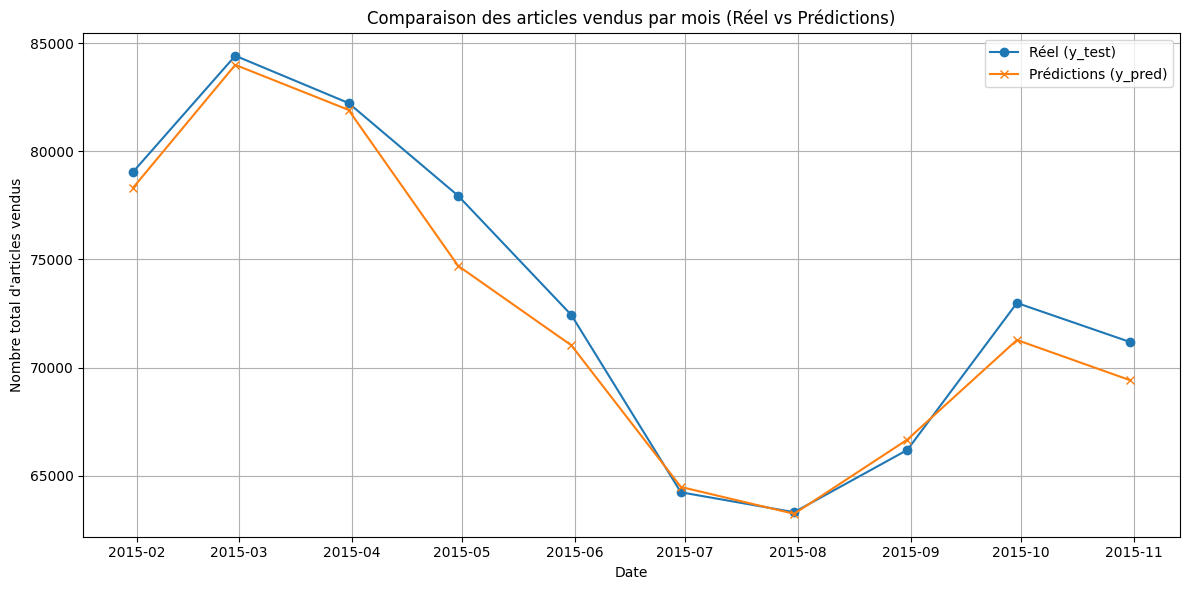

In [29]:
dates_test = df['date'][train_size:]
y_test = pd.Series(y_test.values, index=dates_test)
y_pred = pd.Series(y_pred_test, index=dates_test)

# Regrouper par mois et calculer le total pour chaque mois
y_test_monthly = y_test.resample('M').sum()
y_pred_monthly = y_pred.resample('M').sum()

# Tracer le graphique
plt.figure(figsize=(12, 6))
plt.plot(y_test_monthly.index, y_test_monthly.values, label="Réel (y_test)", marker="o")
plt.plot(y_pred_monthly.index, y_pred_monthly.values, label="Prédictions (y_pred)", marker="x")
plt.title("Comparaison des articles vendus par mois (Réel vs Prédictions)")
plt.xlabel("Date")
plt.ylabel("Nombre total d'articles vendus")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Nous remarquons une amélioration des valeurs prédites après optimisation des paramètres, surtout pour la prédiction mensuelle

La courbe orange est plus proche de la bleue qu'avant

Le modèle montre une meilleure correspondance avec les ventes réelles.
Les prédictions suivent de plus près les variations des ventes réelles, en particulier pendant les pics et les baisses.

Tandis que dans le modèle précedent( avant fine tuning): le modèle présente une sous-estimation des ventes réelles, particulièrement dans les périodes de haute activité (mars à juin 2015).
La divergence entre les courbes des valeurs réelles et des prédictions est plus prononcée

Variation des ventes mensuelles (mars - juin 2015) :

Avant optimisation : Le modèle sous-estime significativement les pics des ventes mensuelles, notamment en mars et avril.

Après optimisation : Les prédictions capturent mieux les pics de ventes, bien qu'une légère sous-estimation persiste.

Périodes de baisse des ventes (juillet - août 2015) :

Avant optimisation : Le modèle suit la tendance globale des ventes, mais les prédictions sont plus éloignées des valeurs réelles.

Après optimisation : Les prédictions s’alignent beaucoup mieux avec les valeurs réelles, en particulier en juillet où la baisse des ventes est correctement modélisée.

Récupération des ventes (septembre - novembre 2015) :

Avant optimisation : Les prédictions augmentent plus lentement que les ventes réelles, ce qui crée un décalage visible.

Après optimisation : Le modèle capture mieux la reprise des ventes en septembre et octobre, même si les prédictions restent légèrement inférieures aux valeurs réelles.

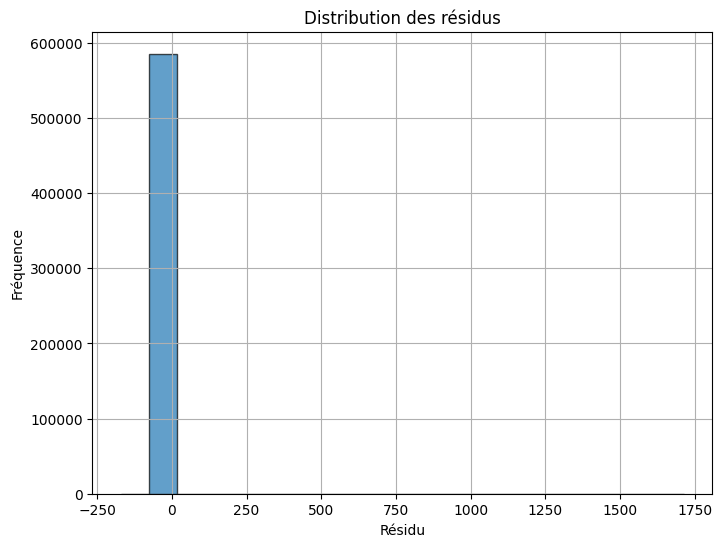

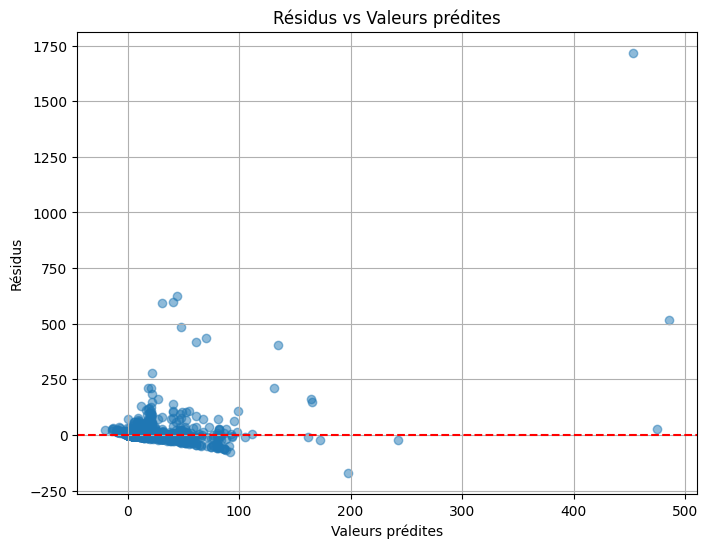

In [30]:
# Calculer les résidus
residuals = y_test - y_pred_test

# Visualiser la distribution des résidus
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor="k", alpha=0.7)
plt.title("Distribution des résidus")
plt.xlabel("Résidu")
plt.ylabel("Fréquence")
plt.grid()
plt.show()

# Scatter plot des résidus vs valeurs prédites
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.grid()
plt.show()


**Bonne performance générale :**

La concentration des résidus autour de zéro montre que le modèle est globalement performant, avec de faibles erreurs pour la plupart des prédictions.
Les valeurs prédites dans les plages basses et moyennes (0 à 100) sont bien modélisées.

**Problèmes avec les valeurs extrêmes :**

Les outliers montrent que le modèle a du mal à capturer les événements rares ou les pics dans les données. Ces erreurs significatives peuvent influencer négativement les métriques globales (comme le MSE ou le RMSE).

**Tendance à sous-estimer :**

L'asymétrie des résidus suggère que le modèle a une légère tendance à sous-estimer les valeurs réelles, en particulier pour des observations avec des valeurs prédites élevées.

<ipython-input-31-20fab90c410b>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y_test_monthly = y_test.resample('M').mean()
<ipython-input-31-20fab90c410b>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y_pred_monthly = y_pred.resample('M').mean()


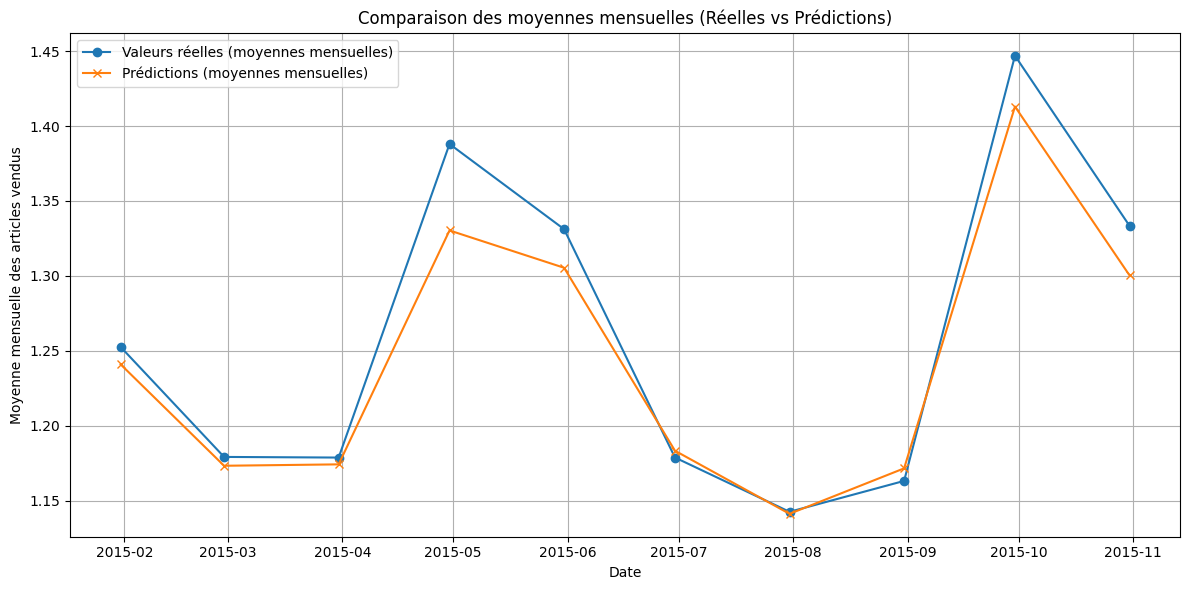

In [31]:
dates_test = df['date'][train_size:]

# Créer des Series pour y_test et y_pred avec l'index des dates
y_test = pd.Series(y_test.values, index=dates_test)  # y_test doit venir de l'ensemble de test réel
y_pred = pd.Series(y_pred_test, index=dates_test)  # Supprimer .values car y_pred_test est déjà un tableau NumPy

# Grouper par mois et calculer la moyenne pour chaque mois
y_test_monthly = y_test.resample('M').mean()
y_pred_monthly = y_pred.resample('M').mean()

# Tracer les moyennes mensuelles
plt.figure(figsize=(12, 6))
plt.plot(y_test_monthly.index, y_test_monthly.values, label="Valeurs réelles (moyennes mensuelles)", marker="o")
plt.plot(y_pred_monthly.index, y_pred_monthly.values, label="Prédictions (moyennes mensuelles)", marker="x")
plt.title("Comparaison des moyennes mensuelles (Réelles vs Prédictions)")
plt.xlabel("Date")
plt.ylabel("Moyenne mensuelle des articles vendus")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [32]:
y_pred_rounded = np.round(y_pred_test).astype(int)

In [33]:
from sklearn.metrics import accuracy_score, f1_score
import seaborn as sns
import numpy as np

# Arrondir les prédictions pour obtenir des entiers
y_pred_rounded = np.round(y_pred_test).astype(int)

# Calculer les métriques
accuracy = accuracy_score(y_test, y_pred_rounded)
f1 = f1_score(y_test, y_pred_rounded, average='weighted')  # 'weighted' pour prendre en compte les classes déséquilibrées

# Afficher les résultats
print(f"Accuracy : {accuracy:.4f}")
print(f"F1 Score : {f1:.4f}")



Accuracy : 0.9843
F1 Score : 0.9845


In [ ]:
import numpy as np

def smape(y_true, y_pred):
    """
    Calcul du Symmetric Mean Absolute Percentage Error (SMAPE)
    """
    return 100 * np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))

def mpe(y_true, y_pred):
    """
    Calcul du Mean Percentage Error (MPE)
    """
    return 100 * np.mean((y_true - y_pred) / y_true)

# Exemple avec y_test (réel) et y_pred_test (prédictions arrondies)
y_pred_rounded = np.round(y_pred_test).astype(int)  # Assurez-vous que y_pred_test est arrondi si nécessaire

# Calculer SMAPE et MPE
smape_value = smape(y_test, y_pred_rounded)
mpe_value = mpe(y_test, y_pred_rounded)

# Afficher les résultats
print(f"SMAPE : {smape_value:.2f}%")
print(f"MPE : {mpe_value:.2f}%")


SMAPE : 0.68%
MPE : -0.42%


**Analyse des métriques SMAPE et MPE**

**SMAPE (Symmetric Mean Absolute Percentage Error)**

Valeur obtenue : 0.68%
Cette valeur est très faible, ce qui indique que les erreurs absolues moyennes relatives (en pourcentage) entre les valeurs réelles et prédites sont minimes.
Un SMAPE proche de zéro est un excellent indicateur, car cela signifie que le modèle prédit très précisément les valeurs réelles, en tenant compte de leur échelle.
Interprétation : Le modèle est performant dans la prédiction globale des ventes, avec une faible marge d'erreur proportionnelle.

**MPE (Mean Percentage Error)**

Valeur obtenue : -0.42%
La valeur négative du MPE indique que le modèle a tendance à légèrement sous-estimer les ventes réelles en moyenne.
Cependant, cette sous-estimation est très faible (moins de 0.5%), ce qui est négligeable dans la plupart des applications.
Interprétation : Le modèle est presque équilibré en termes de biais, avec une petite tendance à prédire des valeurs inférieures aux valeurs réelles.

**Conclusion**

Ce modèle, après optimisation, offre une précision globale excellente, avec un SMAPE très faible (0.68%) et un biais négligeable (MPE de -0.42%). Cela montre qu’il est capable de prédire les ventes de manière fiable et cohérente. Cependant, le modèle pourrait être amélioré pour mieux capturer les pics de ventes ou les événements exceptionnels.

Nous allons tester d'autres modèles comme Arima à qui on ajoutera des indicateurs saisonniers ou des informations contextuelles pour mieux gérer les variations inhabituelles.